In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
PATH = '/home/clarkson/data/us_eq/cache' 

In [43]:
df = pd.read_pickle('{}/log_returns_cleaned.pkl'.format(PATH))

In [44]:
idx = pd.IndexSlice
t = df.loc['2019-01-01':'2019-07-19'].dropna(axis=1)
# print(t.columns[t])
data = df.loc['2019-01-01':'2019-07-19'].dropna(axis=1)
# data = df.interpolate()
data

ticker,AA,AABA,AAON,AAPL,ABC,ABCB,ABM,ABMD,ABT,ACHC,...,PRSP,PBY,ARLO,KLXE,GTX,LTHM,SWI,REZI,ETRN,ACA
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,-0.012874,-0.007797,0.000285,0.001140,0.000672,0.008802,-0.026189,-0.047505,-0.039912,0.005817,...,0.006945,0.004147,0.013931,0.041760,0.024811,0.013674,-0.008715,0.004370,-0.000500,0.020376
2019-01-03,0.000000,-0.034688,-0.037773,-0.104924,-0.014613,-0.003449,-0.010606,-0.025056,-0.048344,-0.017948,...,-0.002310,0.000000,-0.104044,-0.050325,-0.076360,-0.029009,-0.047041,-0.052722,0.000000,0.000707
2019-01-04,0.076989,0.055857,0.053054,0.041803,0.011518,0.038206,0.033675,0.036221,0.028142,0.028717,...,0.047964,0.009711,-0.013245,0.045405,-0.014611,0.048124,0.084268,0.040536,0.035832,0.025486
2019-01-07,0.002819,0.015546,0.015050,-0.002228,0.007116,0.038837,0.044900,0.004330,0.014865,0.006102,...,0.015852,0.012348,-0.022473,0.073668,0.012903,0.009770,0.035891,-0.013330,-0.006773,0.048445
2019-01-08,-0.006000,0.023203,0.004967,0.018884,0.010646,-0.002329,0.043828,0.011434,-0.012079,0.025898,...,0.011860,0.002256,-0.063327,-0.021224,0.107666,-0.003478,0.026757,0.021633,0.006291,-0.007582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-15,0.024908,0.007141,-0.017125,0.009351,0.000890,-0.030234,0.007498,-0.008065,-0.001312,-0.005086,...,-0.005438,0.000000,-0.030341,-0.022606,0.004115,0.018375,0.023002,-0.053499,-0.021850,-0.014819
2019-07-16,0.006453,0.003693,0.005741,-0.003466,-0.010395,0.001586,-0.003863,-0.026560,-0.007786,-0.017550,...,-0.001259,0.008211,-0.004751,-0.014807,-0.004803,-0.005618,-0.020888,-0.013834,-0.013561,0.032154
2019-07-17,-0.007317,-0.001277,-0.012714,-0.005639,-0.040588,-0.014906,-0.004121,0.024563,0.030786,-0.014451,...,0.003773,0.000779,-0.021661,-0.044628,-0.023662,-0.018480,0.000527,-0.020609,-0.012088,0.000545


In [45]:
# cov_matrix = data.apply(lambda x: x / x.std()).cov()
corr = data.corr()
print(data.shape)
corr

(138, 1508)


ticker,AA,AABA,AAON,AAPL,ABC,ABCB,ABM,ABMD,ABT,ACHC,...,PRSP,PBY,ARLO,KLXE,GTX,LTHM,SWI,REZI,ETRN,ACA
ticker,,,,,,,,,,,,,,,,,,,,,
AA,1.000000,0.475914,0.445664,0.408605,0.179879,0.421166,0.370088,0.230450,0.240506,0.195396,...,0.287686,0.285129,0.121076,0.544659,0.313416,0.378942,0.332028,0.319248,0.337255,0.269882
AABA,0.475914,1.000000,0.356507,0.690714,0.184613,0.390787,0.369566,0.307890,0.361597,0.236109,...,0.238101,0.130718,0.115042,0.391669,0.260711,0.364935,0.415782,0.391457,0.297612,0.205760
AAON,0.445664,0.356507,1.000000,0.375317,0.281126,0.419049,0.393650,0.203802,0.324839,0.318720,...,0.304782,0.179614,0.105381,0.376268,0.309068,0.261792,0.312125,0.334872,0.325300,0.322918
AAPL,0.408605,0.690714,0.375317,1.000000,0.185748,0.244683,0.320678,0.286355,0.406274,0.299443,...,0.328104,0.162691,0.172540,0.377133,0.323562,0.283797,0.412421,0.353059,0.262206,0.153100
ABC,0.179879,0.184613,0.281126,0.185748,1.000000,0.300741,0.329803,0.281020,0.261770,0.289088,...,0.242438,0.049502,0.035346,0.175676,0.157332,0.213667,0.199563,0.215511,0.080078,0.140521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LTHM,0.378942,0.364935,0.261792,0.283797,0.213667,0.299591,0.282876,0.172459,0.080023,0.166513,...,0.120937,0.085131,0.057717,0.370107,0.241913,1.000000,0.153164,0.291077,0.169893,0.180954
SWI,0.332028,0.415782,0.312125,0.412421,0.199563,0.245179,0.359003,0.327466,0.380225,0.168069,...,0.353859,0.101490,0.144049,0.250030,0.308821,0.153164,1.000000,0.286959,0.290425,0.221614
REZI,0.319248,0.391457,0.334872,0.353059,0.215511,0.387920,0.536130,0.149570,0.247553,0.190738,...,0.288144,0.187360,0.132898,0.421809,0.206903,0.291077,0.286959,1.000000,0.130114,0.208965


In [46]:
w, v = np.linalg.eigh(corr)

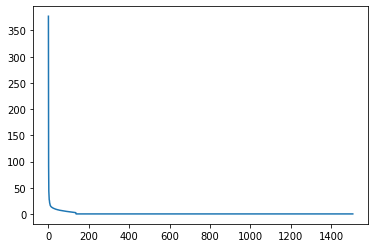

In [47]:
plt.plot([w for w in reversed(w)])

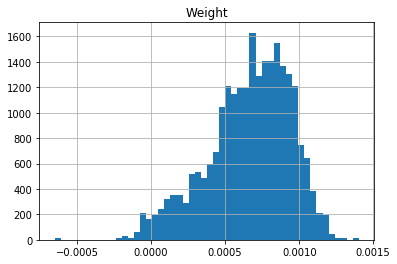

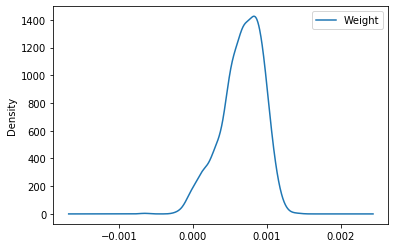

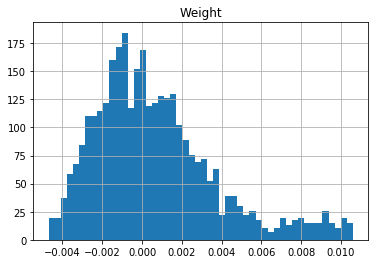

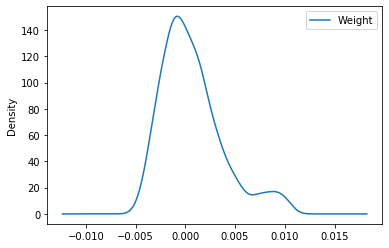

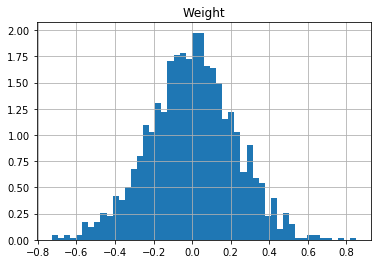

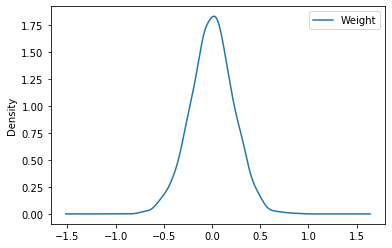

In [57]:
normalise = lambda x: x / np.sum(x)
eig_1 = pd.DataFrame(normalise(v[:,-1]), index=data.columns, columns=['Weight'])
eig_2 = pd.DataFrame(normalise(v[:,-2]), index=data.columns, columns=['Weight'])
# ax = plt
# eig_1.plot(kind='bar')
eig_1.hist(density=True, bins=50)
eig_1.plot.kde()
eig_2.hist(density=True, bins=50)
eig_2.plot.kde()

eig_50 = pd.DataFrame(normalise(v[:,-50]), index=data.columns, columns=['Weight'])
eig_50.hist(density=True, bins=50)
eig_50.plot.kde()


# eig_2.plot(kind='bar')

In [24]:
import src.random_matrix

138
[-5.94323586e-14 -1.40148809e-14 -1.02541794e-14 ...  4.33201474e+01
  9.20512557e+01  3.77133761e+02]


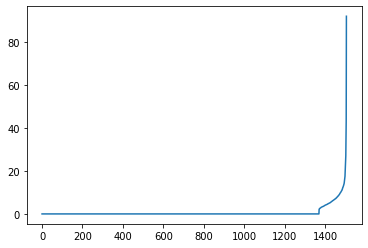

True:  0.0001 377.1337614811945
(1508, 1508)
M: 1508
min: 5.316171400963271 | max: 18.53890106280484
Q: 0.09151193633952255


AssertionError: Invalid dimension ratio for input matrix X

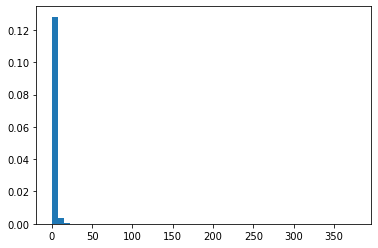

In [26]:
import importlib; importlib.reload(src.random_matrix)
compare_spectrum_to_mp = src.random_matrix.compare_spectrum_to_mp
T = data.shape[0]
print(T)
compare_spectrum_to_mp(corr, T, sigma=1)
# print(len(data))
# data